In [15]:
from statsbombpy import sb
import pandas as pd

In [16]:
matches = sb.matches(competition_id=11, season_id=90)
barca_home_matches = matches[matches["home_team"]=="Barcelona"]
match_ids = barca_home_matches['match_id'].values.tolist()

C:\Users\thors\AppData\Roaming\Python\Python312\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [17]:
events = sb.competition_events(
    country="Spain",
    division= "La Liga",
    season="2020/2021",
    gender="male"
)
events = events[events['match_id'].isin(match_ids)]
df = events[events["possession_team"]=="Barcelona"]

C:\Users\thors\AppData\Roaming\Python\Python312\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [18]:
df

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 352, 'lineup': [{'player': {'id'...",Barcelona,217,00:00:00.000,Starting XI,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 442, 'lineup': [{'player': {'id'...",Celta Vigo,209,00:00:00.000,Starting XI,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Barcelona,217,00:00:00.000,Starting XI,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 442, 'lineup': [{'player': {'id'...",Levante UD,221,00:00:00.000,Starting XI,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Barcelona,217,00:00:00.000,Starting XI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Cádiz,552,00:03:53.408,Player Off,NaN
139019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Cádiz,552,00:07:30.000,Player Off,NaN
139020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Elche,1042,00:37:02.844,Player Off,NaN
139022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Granada,1049,00:39:17.490,Player On,NaN


In [19]:
events_passes = df[df['pass_recipient_id'].notnull()]
#make sure the pass is not a goal kick, throw in, free kick or corner kick
events_passes = events_passes[events_passes["pass_type"].isnull()]
events_passes_filtered = events_passes[["location","pass_end_location","pass_goal_assist"]]

In [20]:
events_passes_filtered["start_x"] = events_passes_filtered["location"].str[0]
events_passes_filtered["start_y"] = events_passes_filtered["location"].str[1]
events_passes_filtered["end_x"] = events_passes_filtered["pass_end_location"].str[0]
events_passes_filtered["end_y"] = events_passes_filtered["pass_end_location"].str[1]


C:\Users\thors\AppData\Local\Temp\ipykernel_20104\275121082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_passes_filtered["start_x"] = events_passes_filtered["location"].str[0]
C:\Users\thors\AppData\Local\Temp\ipykernel_20104\275121082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_passes_filtered["start_y"] = events_passes_filtered["location"].str[1]
C:\Users\thors\AppData\Local\Temp\ipykernel_20104\275121082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [21]:
events_passes_filtered['start_node_x'] = round(events_passes_filtered['start_x'] / 20)
events_passes_filtered['start_node_y'] = round(events_passes_filtered['start_y'] / 20)
events_passes_filtered['end_node_x'] = round(events_passes_filtered['end_x'] / 20)
events_passes_filtered['end_node_y'] = round(events_passes_filtered['end_y'] / 20)

C:\Users\thors\AppData\Local\Temp\ipykernel_20104\2238505626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_passes_filtered['start_node_x'] = round(events_passes_filtered['start_x'] / 20)
C:\Users\thors\AppData\Local\Temp\ipykernel_20104\2238505626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_passes_filtered['start_node_y'] = round(events_passes_filtered['start_y'] / 20)
C:\Users\thors\AppData\Local\Temp\ipykernel_20104\2238505626.py:3: SettingWithCopyWarning: 
A value is trying to

In [22]:
events_passes_filtered["start_node"] = events_passes_filtered["start_node_x"] + events_passes_filtered["start_node_y"] / 10
events_passes_filtered["end_node"] = events_passes_filtered["end_node_x"] + events_passes_filtered["end_node_y"] / 10
events_passes_filtered = events_passes_filtered.drop(['start_x', 'start_y',"end_x","end_y",'location', 'pass_end_location',"start_node_x","start_node_y","end_node_y","end_node_x"], axis=1)

C:\Users\thors\AppData\Local\Temp\ipykernel_20104\156925537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_passes_filtered["start_node"] = events_passes_filtered["start_node_x"] + events_passes_filtered["start_node_y"] / 10
C:\Users\thors\AppData\Local\Temp\ipykernel_20104\156925537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_passes_filtered["end_node"] = events_passes_filtered["end_node_x"] + events_passes_filtered["end_node_y"] / 10


In [23]:
#remove edges between the same node
events_passes_filtered = events_passes_filtered[events_passes_filtered['start_node'] != events_passes_filtered['end_node']]

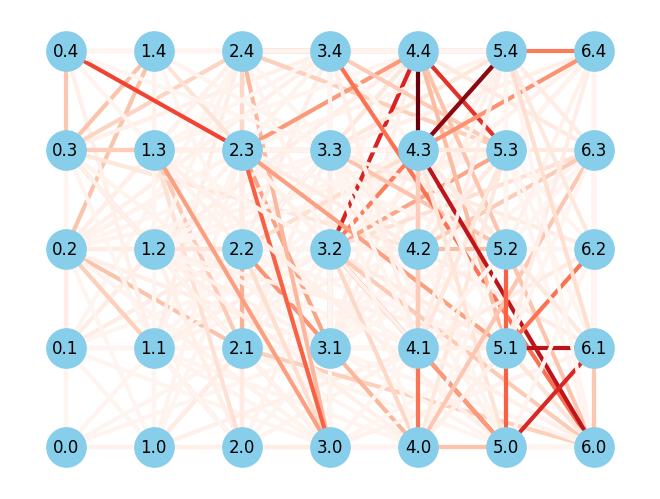

In [24]:
import matplotlib.pyplot as plt
import networkx as nx
events_passes_filtered['count'] = 1  
edge_counts = events_passes_filtered.groupby(['start_node', 'end_node'], as_index=False).count()
edge_counts = edge_counts[["start_node","end_node","count"]]
G=nx.from_pandas_edgelist(edge_counts, 'start_node', 'end_node', create_using=nx.Graph())


norm = plt.Normalize(vmin=edge_counts['count'].min(), vmax=edge_counts['count'].max())
edge_colors = plt.cm.Reds(norm(edge_counts['count']))

pos = {node: (node // 1, node % 1) for node in G.nodes()}

nx.draw(G,pos= pos, with_labels=True, node_color='skyblue', node_size=800, edge_color=edge_colors, width=3)